In [3]:
import pandas as pd
import os
from model_script import perform_preprocessing, read_txt_file, read_sentences
from Sentiment.sentiment_script import vader_sentiment
from NewsSentiment import TargetSentimentClassifier
from NewsSentiment.customexceptions import TargetNotFoundException, TooLongTextException
import warnings
from Sentiment.sentiment_script import vader_sentiment

In [2]:
path = "../BRAT_Data/Ukraine_after/Articles_for_Ania/2022-06-08_DIPLOMACY_China,_Central_Asia_agree_on_broad_cooperation_cov.txt"
df = perform_preprocessing(path)
df

C:\Users\lukas\Desktop\PRACA INŻYNIERSKA\Code\BlameAndPraise\model_script.py:70: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  arg1_start = int(arg1_row['arg1'])
C:\Users\lukas\Desktop\PRACA INŻYNIERSKA\Code\BlameAndPraise\model_script.py:71: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  arg1_end = int(arg1_row['arg2'])
C:\Users\lukas\Desktop\PRACA INŻYNIERSKA\Code\BlameAndPraise\model_script.py:72: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  arg2_start = int(arg2_row['arg1'])
C:\Users\lukas\Desktop\PRACA INŻYNIERSKA\Code\BlameAndPraise\model_script.py:73: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  arg2_end 

,annotation_category,annotation,entity,sentence,entity_atomized
0,blame,the region's most acute challenges of an econo...,"Russia-Ukraine conflict,",Chinese analysts said the outcomes addressed t...,Russia
1,praise,achieved fruitful cooperation and broad consen...,China and five Central Asian countries,China and five Central Asian countries achieve...,Central Asian
2,praise,achieved fruitful cooperation and broad consen...,China and five Central Asian countries,China and five Central Asian countries achieve...,China
3,praise,achieved fruitful cooperation and broad consen...,China and five Central Asian countries,China and five Central Asian countries achieve...,Asia
4,blame,Central Asian countries face great challenges ...,the Russia-Ukraine conflict,"Qian Feng, director of the research department...",Russia
5,blame,The region has also been under great pressure ...,US,The region has also been under great pressure ...,US
6,blame,some regional countries are worried about poss...,the US,The region has also been under great pressure ...,US
7,praise,Cooperation with China has addressed the pragm...,China,Cooperation with China has addressed the pragm...,China


In [3]:
directory = "../BRAT_Data/Ukraine_after/Articles_for_Ania"
#remove warnings

warnings.filterwarnings("ignore")

all_dataframes_Ania = []
all_sentences_Ania = []

for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory, filename)
        print(file_path)
        df = perform_preprocessing(file_path)
        sentences_df = read_sentences(read_txt_file(file_path))['text']
        all_sentences_Ania.append(sentences_df)
        all_dataframes_Ania.append(df)

../BRAT_Data/Ukraine_after/Articles_for_Ania\2022-06-06_OBSERVER_US_upgrading_arms_to_Ukraine_reveals_selfish_forei.txt
../BRAT_Data/Ukraine_after/Articles_for_Ania\2022-06-06_VIEWPOINT_US_policy_of__technological_apartheid__could_lead_.txt
../BRAT_Data/Ukraine_after/Articles_for_Ania\2022-06-07_AMERICAS__No_longer_US__backyard,__Latin_America_sends_unit.txt
../BRAT_Data/Ukraine_after/Articles_for_Ania\2022-06-07_CROSS-BORDERS_Ukraine,_Moldova_agree_to_facilitate_border_crossi.txt
../BRAT_Data/Ukraine_after/Articles_for_Ania\2022-06-08_DIPLOMACY_China,_Central_Asia_agree_on_broad_cooperation_cov.txt
../BRAT_Data/Ukraine_after/Articles_for_Ania\2022-06-08_DIPLOMACY_European_Parliament_s_latest_report_concerning_Chi.txt
../BRAT_Data/Ukraine_after/Articles_for_Ania\2022-06-08_ECONOMY_China_harvests_over_half_of_summer_crop,_11.13_mln.txt
../BRAT_Data/Ukraine_after/Articles_for_Ania\2022-06-08_ECONOMY_Japanese_yen_may_fall_further,_risking_safe_haven_.txt
../BRAT_Data/Ukraine_after/Article

In [4]:
directory = "../BRAT_Data/Ukraine_after/Articles_for_Agnieszka"
#remo

all_dataframes_Agnieszka = []
all_sentences_Agnieszka = []

for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory, filename)
        print(file_path)
        df = perform_preprocessing(file_path)
        sentences_df = read_sentences(read_txt_file(file_path))['text']
        all_sentences_Agnieszka.append(sentences_df)
        all_dataframes_Agnieszka.append(df)

../BRAT_Data/Ukraine_after/Articles_for_Agnieszka\2022-06-06_ASIAN_REVIEW_A_mission_impossible_for_the_US_to_woo_Asia-Pacifi.txt
../BRAT_Data/Ukraine_after/Articles_for_Agnieszka\2022-06-07_DIPLOMACY_Chinese_envoy_warns_against_providing_weapons_to_U.txt
../BRAT_Data/Ukraine_after/Articles_for_Agnieszka\2022-06-07_DIPLOMACY_Wang_Yi_meets_with_Kazakh_president,_stresses_vigi.txt
../BRAT_Data/Ukraine_after/Articles_for_Agnieszka\2022-06-07_ECONOMY_US_behind_global_grain_crises__Chinese_FM_spokespe.txt
../BRAT_Data/Ukraine_after/Articles_for_Agnieszka\2022-06-08_COLUMNISTS_China-EU_economic_ties_on_brink_of_an_ideological_.txt
../BRAT_Data/Ukraine_after/Articles_for_Agnieszka\2022-06-08_ECONOMY_China_issues_certification_standards_for_GM_crops_.txt
../BRAT_Data/Ukraine_after/Articles_for_Agnieszka\2022-06-08_EUROPE_Ukraine_says_in_talks_with_UN_over_humanitarian_co.txt
../BRAT_Data/Ukraine_after/Articles_for_Agnieszka\2022-06-08_EYE_ON_WORLD__UN_calls_for_Somalia_drought_relief.txt
../BRA

In [5]:
merged_dataframe = pd.concat(all_dataframes_Ania + all_dataframes_Agnieszka, ignore_index=True)
merged_dataframe

,annotation_category,annotation,entity,sentence,entity_atomized
0,blame,"new arms deliveries to Kiev are aimed at ""prol...",US,Speaking to the Rossiya-1 state television cha...,US
1,blame,has been sending more advanced and heavier wea...,US,"From the beginning, the US has been sending mo...",US
2,blame,clearly knows that a prolonged conflict betwee...,US,The US clearly knows that a prolonged conflict...,US
3,blame,has put its national interests into considerat...,US,The US has put its national interests into con...,US
4,blame,"With self-interests in mind, the US will not s...",US,"With self-interests in mind, the US will not s...",US
...,...,...,...,...,...
406,blame,"US inflation will become higher, ordinary peop...",If the US does prohibit oil exports to China,The US only has itself to blame for the curren...,US
407,blame,"US inflation will become higher, ordinary peop...",If the US does prohibit oil exports to China,The US only has itself to blame for the curren...,China
408,blame,"would undermine US oil companies, and they wil...",Prohibiting the export of oil and petroleum pr...,Prohibiting the export of oil and petroleum pr...,US
409,blame,"would undermine US oil companies, and they wil...",Prohibiting the export of oil and petroleum pr...,Prohibiting the export of oil and petroleum pr...,China


In [6]:
merged_dataframe['sentiment'] = merged_dataframe['sentence'].apply(vader_sentiment)
merged_dataframe

,annotation_category,annotation,entity,sentence,entity_atomized,sentiment
0,blame,"new arms deliveries to Kiev are aimed at ""prol...",US,Speaking to the Rossiya-1 state television cha...,US,negative
1,blame,has been sending more advanced and heavier wea...,US,"From the beginning, the US has been sending mo...",US,negative
2,blame,clearly knows that a prolonged conflict betwee...,US,The US clearly knows that a prolonged conflict...,US,positive
3,blame,has put its national interests into considerat...,US,The US has put its national interests into con...,US,positive
4,blame,"With self-interests in mind, the US will not s...",US,"With self-interests in mind, the US will not s...",US,negative
...,...,...,...,...,...,...
406,blame,"US inflation will become higher, ordinary peop...",If the US does prohibit oil exports to China,The US only has itself to blame for the curren...,US,negative
407,blame,"US inflation will become higher, ordinary peop...",If the US does prohibit oil exports to China,The US only has itself to blame for the curren...,China,negative
408,blame,"would undermine US oil companies, and they wil...",Prohibiting the export of oil and petroleum pr...,Prohibiting the export of oil and petroleum pr...,US,negative
409,blame,"would undermine US oil companies, and they wil...",Prohibiting the export of oil and petroleum pr...,Prohibiting the export of oil and petroleum pr...,China,negative


In [7]:
# Add sentiment analysis per target for atomized_entity
tsc = TargetSentimentClassifier()
tsc_labels = []

for index, row in merged_dataframe.iterrows():
    target = row['entity_atomized'].lower()
    sentence = row['sentence']

    if target.lower() in sentence:
        entity_start = sentence.find(target.lower())
        entity_end = entity_start + len(target)
        left_context = sentence[:entity_start]
        right_context = sentence[entity_end:]

    try:
        sentiment_tsc = tsc.infer_from_text(left_context, target, right_context)
    except TooLongTextException:
        print(f"TooLongTextException: {target} - Sentence too long for TSC")
        tsc_labels.append(None)
        continue  # move on to the next target
    except TargetNotFoundException:
        print(f"TargetNotFoundException: {target} not found in {sentence}")
        tsc_labels.append(None)
        continue  # move on to the next target

    sentiment_label_tsc = sentiment_tsc[0]['class_label'].lower()
    tsc_labels.append(sentiment_label_tsc)

merged_dataframe['tsc_sentiment'] = tsc_labels
merged_dataframe

Processing batches: 100%|██████████| 1/1 [00:00<00:00,  1.93batch/s]


,annotation_category,annotation,entity,sentence,entity_atomized,sentiment,tsc_sentiment
0,blame,"new arms deliveries to Kiev are aimed at ""prol...",US,Speaking to the Rossiya-1 state television cha...,US,negative,neutral
1,blame,has been sending more advanced and heavier wea...,US,"From the beginning, the US has been sending mo...",US,negative,neutral
2,blame,clearly knows that a prolonged conflict betwee...,US,The US clearly knows that a prolonged conflict...,US,positive,neutral
3,blame,has put its national interests into considerat...,US,The US has put its national interests into con...,US,positive,neutral
4,blame,"With self-interests in mind, the US will not s...",US,"With self-interests in mind, the US will not s...",US,negative,neutral
...,...,...,...,...,...,...,...
406,blame,"US inflation will become higher, ordinary peop...",If the US does prohibit oil exports to China,The US only has itself to blame for the curren...,US,negative,neutral
407,blame,"US inflation will become higher, ordinary peop...",If the US does prohibit oil exports to China,The US only has itself to blame for the curren...,China,negative,negative
408,blame,"would undermine US oil companies, and they wil...",Prohibiting the export of oil and petroleum pr...,Prohibiting the export of oil and petroleum pr...,US,negative,neutral
409,blame,"would undermine US oil companies, and they wil...",Prohibiting the export of oil and petroleum pr...,Prohibiting the export of oil and petroleum pr...,China,negative,negative


In [8]:
merged_sentences = pd.DataFrame(pd.concat(all_sentences_Ania + all_sentences_Agnieszka, ignore_index=True))
merged_sentences = merged_sentences.rename(columns={'text': 'sentence'})
merged_sentences

,sentence
0,Speaking to the Rossiya-1 state television cha...
1,"""Putin's remarks came a few days after US Pres..."
2,"""Putin did not specify which targets he meant."
3,"Song Zhongping, a Beijing-based military exper..."
4,"From the beginning, the US has been sending mo..."
...,...
12796,"That must be respected, as we would expect Chi..."
12797,"Of course, one can have opinions on these things."
12798,One can even make criticisms if one wants.
12799,But they shouldn't interfere in state relation...


In [9]:
# One-hot encode the 'annotation_category' column for 'blame' and 'praise'
one_hot = pd.get_dummies(merged_dataframe['annotation_category'], columns=['blame', 'praise'])
merged_dataframe = pd.concat([merged_dataframe, one_hot[['blame', 'praise']]], axis=1)
#map sentiment to 1 , 0, -1
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
merged_dataframe['sentiment'] = merged_dataframe['sentiment'].map(sentiment_map)
merged_dataframe['tsc_sentiment'] = merged_dataframe['tsc_sentiment'].map(sentiment_map)
#blame and praise to 1 and 0
merged_dataframe['blame'] = merged_dataframe['blame'].astype(int)
merged_dataframe['praise'] = merged_dataframe['praise'].astype(int)
merged_dataframe

,annotation_category,annotation,entity,sentence,entity_atomized,sentiment,tsc_sentiment,blame,praise
0,blame,"new arms deliveries to Kiev are aimed at ""prol...",US,Speaking to the Rossiya-1 state television cha...,US,-1,0,1,0
1,blame,has been sending more advanced and heavier wea...,US,"From the beginning, the US has been sending mo...",US,-1,0,1,0
2,blame,clearly knows that a prolonged conflict betwee...,US,The US clearly knows that a prolonged conflict...,US,1,0,1,0
3,blame,has put its national interests into considerat...,US,The US has put its national interests into con...,US,1,0,1,0
4,blame,"With self-interests in mind, the US will not s...",US,"With self-interests in mind, the US will not s...",US,-1,0,1,0
...,...,...,...,...,...,...,...,...,...
406,blame,"US inflation will become higher, ordinary peop...",If the US does prohibit oil exports to China,The US only has itself to blame for the curren...,US,-1,0,1,0
407,blame,"US inflation will become higher, ordinary peop...",If the US does prohibit oil exports to China,The US only has itself to blame for the curren...,China,-1,-1,1,0
408,blame,"would undermine US oil companies, and they wil...",Prohibiting the export of oil and petroleum pr...,Prohibiting the export of oil and petroleum pr...,US,-1,0,1,0
409,blame,"would undermine US oil companies, and they wil...",Prohibiting the export of oil and petroleum pr...,Prohibiting the export of oil and petroleum pr...,China,-1,-1,1,0


In [10]:
merged_dataframe.to_csv('merged_dataframe.csv', index=False)

In [11]:
final_df = merged_dataframe[['sentence', 'blame', 'praise']]
final_df = merged_sentences.merge(final_df, left_on='sentence', right_on='sentence', how='left')
final_df = final_df.fillna(0)
final_df['blame'] = final_df['blame'].astype(int)
final_df['praise'] = final_df['praise'].astype(int)
final_df

,sentence,blame,praise
0,Speaking to the Rossiya-1 state television cha...,1,0
1,"""Putin's remarks came a few days after US Pres...",0,0
2,"""Putin did not specify which targets he meant.",0,0
3,"Song Zhongping, a Beijing-based military exper...",0,0
4,"From the beginning, the US has been sending mo...",1,0
...,...,...,...
12960,"That must be respected, as we would expect Chi...",0,0
12961,"Of course, one can have opinions on these things.",0,0
12962,One can even make criticisms if one wants.,0,0
12963,But they shouldn't interfere in state relation...,0,0


In [12]:
# Balance the final_df
blame_df = final_df[final_df['blame'] == 1]
praise_df = final_df[final_df['praise'] == 1]
neutral_df = final_df[(final_df['blame'] == 0) & (final_df['praise'] == 0)]

# Calculate the minimum size to balance the classes
min_size = min(len(blame_df), len(praise_df))
max_size = max(len(blame_df), len(praise_df))


neutral_sampled = neutral_df.sample(3*len(blame_df), random_state=42)
final_balanced_df = pd.concat([blame_df, praise_df, neutral_sampled], ignore_index=True)
final_balanced_df = final_balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
final_balanced_df

,sentence,blame,praise
0,And in case of nuclear war we will become prim...,0,0
1,The key question is whether China can prevail ...,0,0
2,No one should underestimate the strong resolve...,0,1
3,"In fact, it is the desire for our output from ...",0,0
4,So do you think the national security law in H...,0,0
...,...,...,...
1297,GT: How do you evaluate the establishment of a...,0,0
1298,"By Saturday, a total of 108 vehicles and 350.6...",0,0
1299,"They deal the card ""responsible for food crisi...",0,0
1300,"However, the Conservative government has not c...",0,0


In [4]:
merged_dataframe = pd.read_csv('merged_dataframe.csv')
merged_dataframe['annotation'] = merged_dataframe['annotation_category'].map({'blame': -1, 'praise': 1})
merged_dataframe
#map annotation category to 1 and 0

,annotation_category,annotation,entity,sentence,entity_atomized,sentiment,tsc_sentiment,blame,praise
0,blame,-1.0,US,Speaking to the Rossiya-1 state television cha...,US,-1,0,1,0
1,blame,-1.0,US,"From the beginning, the US has been sending mo...",US,-1,0,1,0
2,blame,-1.0,US,The US clearly knows that a prolonged conflict...,US,1,0,1,0
3,blame,-1.0,US,The US has put its national interests into con...,US,1,0,1,0
4,blame,-1.0,US,"With self-interests in mind, the US will not s...",US,-1,0,1,0
...,...,...,...,...,...,...,...,...,...
406,blame,-1.0,If the US does prohibit oil exports to China,The US only has itself to blame for the curren...,US,-1,0,1,0
407,blame,-1.0,If the US does prohibit oil exports to China,The US only has itself to blame for the curren...,China,-1,-1,1,0
408,blame,-1.0,Prohibiting the export of oil and petroleum pr...,Prohibiting the export of oil and petroleum pr...,US,-1,0,1,0
409,blame,-1.0,Prohibiting the export of oil and petroleum pr...,Prohibiting the export of oil and petroleum pr...,China,-1,-1,1,0


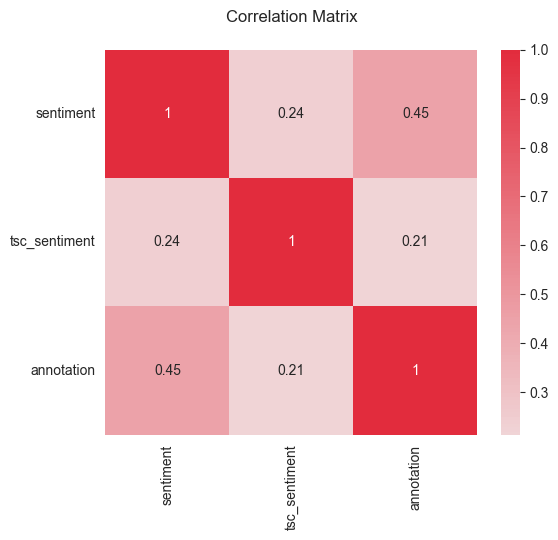

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot correlation matrix using seaborn
correlation_data = merged_dataframe[['sentiment', 'tsc_sentiment', 'annotation']]
correlation_matrix = correlation_data.corr()
# Custom cmap green to lightgray to red
cmap = sns.diverging_palette(125, 10, as_cmap=True, s=85, l=50, sep=20, center="light")
# Create the seaborn heatmap with the specified color palette
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, cbar=True, center=0)

# Add labels and title
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Matrix", pad=20)

plt.show()

In [8]:
import pandas as pd
import os
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.metrics import Recall
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
merged_dataframe

,annotation_category,annotation,entity,sentence,entity_atomized,sentiment,tsc_sentiment,blame,praise
0,blame,-1.0,US,Speaking to the Rossiya-1 state television cha...,US,-1,0,1,0
1,blame,-1.0,US,"From the beginning, the US has been sending mo...",US,-1,0,1,0
2,blame,-1.0,US,The US clearly knows that a prolonged conflict...,US,1,0,1,0
3,blame,-1.0,US,The US has put its national interests into con...,US,1,0,1,0
4,blame,-1.0,US,"With self-interests in mind, the US will not s...",US,-1,0,1,0
...,...,...,...,...,...,...,...,...,...
406,blame,-1.0,If the US does prohibit oil exports to China,The US only has itself to blame for the curren...,US,-1,0,1,0
407,blame,-1.0,If the US does prohibit oil exports to China,The US only has itself to blame for the curren...,China,-1,-1,1,0
408,blame,-1.0,Prohibiting the export of oil and petroleum pr...,Prohibiting the export of oil and petroleum pr...,US,-1,0,1,0
409,blame,-1.0,Prohibiting the export of oil and petroleum pr...,Prohibiting the export of oil and petroleum pr...,China,-1,-1,1,0


[[1129    3    1 ...    0    0    0]
 [  25    1  270 ...    0    0    0]
 [   1   11 1459 ...    0    0    0]
 ...
 [2017    1  846 ...    0    0    0]
 [2017    1  846 ...    0    0    0]
 [  70  248 1136 ...    0    0    0]]
Epoch 1/5


C:\Users\lukas\PycharmProjects\Code\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - blame_praise_output_accuracy: 0.6233 - blame_praise_output_loss: 0.6590 - loss: 1.6099 - sentiment_output_loss: 0.9495 - sentiment_output_mae: 0.9480 - val_blame_praise_output_accuracy: 0.6747 - val_blame_praise_output_loss: 0.6068 - val_loss: 1.4749 - val_sentiment_output_loss: 0.8734 - val_sentiment_output_mae: 0.8828
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - blame_praise_output_accuracy: 0.7106 - blame_praise_output_loss: 0.5952 - loss: 1.5221 - sentiment_output_loss: 0.9248 - sentiment_output_mae: 0.9353 - val_blame_praise_output_accuracy: 0.6747 - val_blame_praise_output_loss: 0.6123 - val_loss: 1.4333 - val_sentiment_output_loss: 0.8373 - val_sentiment_output_mae: 0.8605
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - blame_praise_output_accuracy: 0.7106 - blame_praise_output_loss: 0.5887 - loss: 1.5097 - sentiment_output_loss: 0.9198 - sentiment_output_mae: 0.9251 - val_blame_praise_output_accuracy: 0.6867 - val_blame_prais

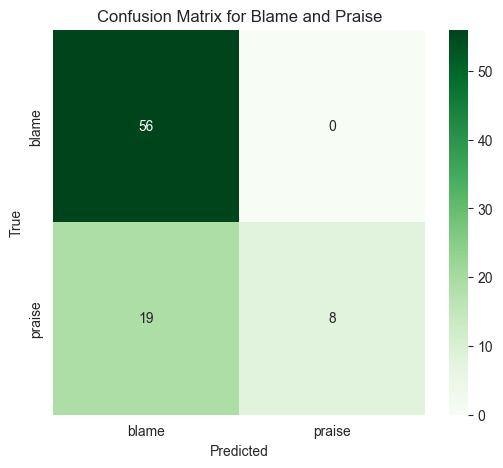

In [32]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

final_df = merged_dataframe[['sentence', 'sentiment', 'blame', 'praise']]
# Tokenization and padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(final_df['sentence'])
sequences = tokenizer.texts_to_sequences(final_df['sentence'])
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post')
print(padded_sequences)

# Prepare the labels
labels_blame_praise = final_df[['blame', 'praise']].values
labels_sentiment = final_df['sentiment'].values

# Train-test split
X_train, X_test, y_train_blame_praise, y_test_blame_praise = train_test_split(
    padded_sequences, labels_blame_praise, test_size=0.2, random_state=42
)
y_train_sentiment, y_test_sentiment = train_test_split(
    labels_sentiment, test_size=0.2, random_state=42
)

# Define the multi-task model
input_layer = Input(shape=(100,))
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=100)(input_layer)
lstm_layer = LSTM(64, return_sequences=False)(embedding_layer)

# Output 1: For blame and praise (categorical)
output_blame_praise = Dense(2, activation='softmax', name='blame_praise_output')(lstm_layer)

# Output 2: For sentiment (regression: -1, 0, 1)
output_sentiment = Dense(1, activation='tanh', name='sentiment_output')(lstm_layer)

model = Model(inputs=input_layer, outputs=[output_blame_praise, output_sentiment])

model.compile(
    optimizer='adam',
    loss={'blame_praise_output': 'categorical_crossentropy', 'sentiment_output': 'mse'},
    metrics={'blame_praise_output': 'accuracy', 'sentiment_output': 'mae'}
)

# Train the model
history = model.fit(
    X_train,
    {'blame_praise_output': y_train_blame_praise, 'sentiment_output': y_train_sentiment},
    epochs=5,
    batch_size=32,
    validation_data=(X_test, {'blame_praise_output': y_test_blame_praise, 'sentiment_output': y_test_sentiment}),
)

# Evaluate the model
y_pred_blame_praise, y_pred_sentiment = model.predict(X_test)

# Classification report for blame and praise
y_pred_blame_praise_classes = (y_pred_blame_praise > 0.5).astype(int)
print(classification_report(y_test_blame_praise, y_pred_blame_praise_classes, target_names=['blame', 'praise']))

# Mean Absolute Error for sentiment
mae_sentiment = sum(abs(y_pred_sentiment.flatten() - y_test_sentiment)) / len(y_test_sentiment)
print(f"Mean Absolute Error for Sentiment: {mae_sentiment}")

# Generate and visualize the confusion matrix for blame and praise
conf_matrix = confusion_matrix(y_test_blame_praise.argmax(axis=1), y_pred_blame_praise_classes.argmax(axis=1))
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=['blame', 'praise'], yticklabels=['blame', 'praise'])
plt.title("Confusion Matrix for Blame and Praise")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [12]:
# One-hot encode the 'annotation_category' column for 'blame' and 'praise'
#me

df_to_train = merged_dataframe[['sentence', 'annotation']]
sentences = df_to_train['sentence'].values
labels = df_to_train['annotation'].values

# Tokenize and transform sentences into sequences
# tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

# Padding sequences to ensure uniform length
max_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Build the model
vocab_size = len(tokenizer.word_index) + 1  # Vocabulary size
embedding_dim = 64

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(4, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[Recall(name='recall')])

# Train the model
epochs = 4
batch_size = 64
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/4


C:\Users\lukas\PycharmProjects\Code\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


ValueError: No loss to compute. Provide a `loss` argument in `compile()`.

In [130]:
# Prepare the entire dataset (merged sentences with blame and praise)
X_full = tokenizer.texts_to_sequences(final_df['sentence'])
X_full = pad_sequences(X_full, maxlen=max_length)

# Get predictions for the whole dataset
y_full_pred = (model.predict(X_full) > 0.5).astype("int32")

# Evaluate the model on the full dataset
metrics = model.evaluate(X_full, final_df['blame'])

print(f"Metrics on the full dataset:")
print(f"Loss: {metrics[0]:.4f}")
print(f"Recall: {metrics[1]:.4f}")

# Generate confusion matrix for the full dataset
conf_matrix_full = confusion_matrix(final_df['blame'], y_full_pred)
print("Confusion Matrix for Full Dataset:")
print(conf_matrix_full)

# Visualize the full dataset confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_full, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Blame", "Blame"], yticklabels=["Not Blame", "Blame"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Full Dataset")
plt.show()

400/400 [==============================] - 12s 27ms/step


ValueError: in user code:

    File "C:\Users\lukas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2042, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\lukas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2025, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\lukas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2013, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\lukas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1895, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\lukas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1185, in compute_loss
        return self.compiled_loss(
    File "C:\Users\lukas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\lukas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\lukas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\lukas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 2532, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\lukas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py", line 5824, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 16) vs (None, 1)).


In [43]:
import pandas as pd
import os
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# One-hot encode the 'annotation_category' column for 'blame' and 'praise'
df_to_train = merged_dataframe[['sentence', 'praise']]

# Prepare data for modeling
sentences = df_to_train['sentence'].values
labels = df_to_train['praise'].values

# Tokenize and transform sentences into sequences
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

# Padding sequences to ensure uniform length
max_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Build the model
vocab_size = len(tokenizer.word_index) + 1  # Vocabulary size
embedding_dim = 64

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
batch_size = 32
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/5
11/11 [==============================] - 4s 96ms/step - loss: 0.6694 - accuracy: 0.6726 - val_loss: 0.5934 - val_accuracy: 0.7412
Epoch 2/5
11/11 [==============================] - 0s 44ms/step - loss: 0.5991 - accuracy: 0.7109 - val_loss: 0.5506 - val_accuracy: 0.7412
Epoch 3/5
11/11 [==============================] - 0s 41ms/step - loss: 0.5672 - accuracy: 0.7227 - val_loss: 0.5356 - val_accuracy: 0.7765
Epoch 4/5
11/11 [==============================] - 0s 42ms/step - loss: 0.5416 - accuracy: 0.7699 - val_loss: 0.5030 - val_accuracy: 0.8000
Epoch 5/5
3/3 [==============================] - 0s 14ms/step - loss: 0.4939 - accuracy: 0.8000
Test Accuracy: 80.00%
